In [1]:
import pandas as pd
import numpy as np
from plotnine import *

c:\Users\wafia\miniconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5


In [2]:
# Opening population data
df_pop = pd.read_csv('../20_intermediate_files/vital_stats_merged.csv', index_col=0)
df_pop = df_pop.drop('Crude Rate', axis = 1)
df_pop['county_name_only'] = df_pop["County Name"].str[:-7]
df_pop.head(2)

,Year,State,State Code,County,County Code,Cause of death,Cause of death Code,Deaths,Population,State_Code,County Name,county_name_only
32,2007,Arkansas,5.0,"Garland County, AR",5051.0,Poisoning by and exposure to other and unspeci...,Y14,12.0,94753.0,AR,Garland County,Garland
33,2007,Arkansas,5.0,"Pulaski County, AR",5119.0,Poisoning by and exposure to other and unspeci...,Y14,11.0,373403.0,AR,Pulaski County,Pulaski


In [3]:
df_pop['Year'].unique()

array([2007, 2008, 2009, 2010, 2011, 2012], dtype=int64)

In [4]:
# Random checking to make sure we have the states
(df_pop['State']=='Florida').value_counts()

False    1707
True      394
Name: State, dtype: int64

In [5]:
# Opening perscription data
df_pres = pd.read_csv('../20_intermediate_files/prescription_data_grouped_1.csv')
(df_pres['MME']==0).value_counts()
df_pres["T_YEAR"].unique()

array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014], dtype=int64)

In [6]:
# Dropping unnecessary columns
df_pop = df_pop.drop(["State Code", "County", 'County Code', 'Cause of death', 'Cause of death Code', 'County Name'], axis=1)

In [7]:
df_pop.sample(2)

,Year,State,Deaths,Population,State_Code,county_name_only
807,2008,California,92.0,3022116.0,CA,San Diego
79,2007,California,25.0,1381161.0,CA,Sacramento


In [8]:
# Creating filter column for population df
df_pop_grouped = df_pop.groupby(['Year', 'State', 'State_Code', 'county_name_only']).sum().reset_index()
df_pop_grouped['county_name_only'] = df_pop_grouped['county_name_only'].str.lower()
df_pop_grouped['Year_string'] = df_pop_grouped['Year'].astype('str')
df_pop_grouped['filter'] = df_pop_grouped['State_Code'] + df_pop_grouped['county_name_only'] + df_pop_grouped['Year_string']
df_pop_grouped

,Year,State,State_Code,county_name_only,Deaths,Population,Year_string,filter
0,2007,Arkansas,AR,garland,12.0,94753.0,2007,ARgarland2007
1,2007,Arkansas,AR,pulaski,11.0,373403.0,2007,ARpulaski2007
2,2007,Arkansas,AR,sebastian,21.0,245892.0,2007,ARsebastian2007
3,2007,California,CA,alameda,178.0,5822860.0,2007,CAalameda2007
4,2007,California,CA,butte,51.0,434938.0,2007,CAbutte2007
...,...,...,...,...,...,...,...,...
986,2012,Washington,WA,snohomish,121.0,2199108.0,2012,WAsnohomish2012
987,2012,Washington,WA,spokane,67.0,951470.0,2012,WAspokane2012
988,2012,Washington,WA,thurston,22.0,516664.0,2012,WAthurston2012
989,2012,Washington,WA,yakima,15.0,246977.0,2012,WAyakima2012


In [9]:
# Filtering year and lowercase county name
df_pres = df_pres.loc[(df_pres['T_YEAR']>2006) & (df_pres['T_YEAR']<=2012)]
df_pres['county_name_only'] = df_pres['BUYER_COUNTY'].str.lower()

In [10]:
# Grouping prescription df to avoid duplicate state and county name
df_pres_grouped = df_pres.groupby(['BUYER_STATE', 'BUYER_COUNTY', 'T_YEAR', 'county_name_only']).sum().reset_index()
df_pres_grouped

,BUYER_STATE,BUYER_COUNTY,T_YEAR,county_name_only,MME
0,AR,ACCOMACK,2007,accomack,0.0
1,AR,ACCOMACK,2008,accomack,0.0
2,AR,ACCOMACK,2009,accomack,0.0
3,AR,ACCOMACK,2010,accomack,0.0
4,AR,ACCOMACK,2011,accomack,0.0
...,...,...,...,...,...
144667,WY,ZAVALA,2008,zavala,0.0
144668,WY,ZAVALA,2009,zavala,0.0
144669,WY,ZAVALA,2010,zavala,0.0
144670,WY,ZAVALA,2011,zavala,0.0


In [11]:
# Creating filter column for population df
df_pres_grouped['Year'] = df_pres_grouped['T_YEAR'].astype('str')
df_pres_grouped['filter'] = df_pres_grouped['BUYER_STATE'] + df_pres_grouped['county_name_only'] + df_pres_grouped['Year']
df_pres_grouped.loc[df_pres_grouped['BUYER_STATE']=='FL']


,BUYER_STATE,BUYER_COUNTY,T_YEAR,county_name_only,MME,Year,filter
13152,FL,ACCOMACK,2007,accomack,0.0,2007,FLaccomack2007
13153,FL,ACCOMACK,2008,accomack,0.0,2008,FLaccomack2008
13154,FL,ACCOMACK,2009,accomack,0.0,2009,FLaccomack2009
13155,FL,ACCOMACK,2010,accomack,0.0,2010,FLaccomack2010
13156,FL,ACCOMACK,2011,accomack,0.0,2011,FLaccomack2011
...,...,...,...,...,...,...,...
19723,FL,ZAVALA,2008,zavala,0.0,2008,FLzavala2008
19724,FL,ZAVALA,2009,zavala,0.0,2009,FLzavala2009
19725,FL,ZAVALA,2010,zavala,0.0,2010,FLzavala2010
19726,FL,ZAVALA,2011,zavala,0.0,2011,FLzavala2011


In [12]:
# filtering the data to only county and state exist in population data
df_pres_grouped.loc[df_pres_grouped['filter'].isin(df_pop_grouped['filter']),:]

,BUYER_STATE,BUYER_COUNTY,T_YEAR,county_name_only,MME,Year,filter
421,AR,BENTON,2008,benton,62972.139553,2008,ARbenton2008
422,AR,BENTON,2009,benton,77613.250041,2009,ARbenton2009
423,AR,BENTON,2010,benton,94245.623212,2010,ARbenton2010
424,AR,BENTON,2011,benton,108174.008607,2011,ARbenton2011
425,AR,BENTON,2012,benton,119748.607938,2012,ARbenton2012
...,...,...,...,...,...,...,...
138000,WA,YAKIMA,2007,yakima,48714.182522,2007,WAyakima2007
138002,WA,YAKIMA,2009,yakima,61959.784165,2009,WAyakima2009
138003,WA,YAKIMA,2010,yakima,67468.869215,2010,WAyakima2010
138005,WA,YAKIMA,2012,yakima,80232.646681,2012,WAyakima2012


In [13]:
# dropping unnecessary columns
df_pop_grouped = df_pop_grouped.drop(['Year_string', 'filter'], axis=1)
df_pres_grouped = df_pres_grouped.drop(['Year', 'filter'], axis=1)

In [14]:
# Merge both dataframe into merged_df
merged_df = df_pop_grouped.merge(df_pres_grouped, left_on=["Year","State_Code","county_name_only"], right_on=["T_YEAR","BUYER_STATE","county_name_only"])
merged_df = merged_df.drop(["BUYER_STATE", "BUYER_COUNTY", "T_YEAR"], axis=1)

In [15]:
# Checking value below 10 (small value of mme seems irrelevant)
merged_df.loc[merged_df['MME']<10,:]

,Year,State,State_Code,county_name_only,Deaths,Population,MME


In [18]:
# defining control states
we_want_florida = ['Nevada', 'New York', 'California']

df_florida = merged_df[merged_df['State'].isin(we_want_florida)]

In [19]:
df_florida

,Year,State,State_Code,county_name_only,Deaths,Population,MME
3,2007,California,CA,alameda,178.0,5822860.0,507600.817213
4,2007,California,CA,butte,51.0,434938.0,167352.343089
5,2007,California,CA,contra costa,85.0,4036608.0,233141.543279
6,2007,California,CA,el dorado,29.0,355388.0,66500.701152
7,2007,California,CA,fresno,70.0,2687799.0,238893.482471
...,...,...,...,...,...,...,...
918,2012,New York,NY,oswego,11.0,121700.0,46231.243386
919,2012,New York,NY,queens,131.0,9091084.0,478503.883257
920,2012,New York,NY,richmond,76.0,941456.0,293572.239095
921,2012,New York,NY,suffolk,278.0,5997092.0,676708.808721


In [21]:
# Grouping control state
groupedby_df_florida = df_florida.groupby(["Year"]).sum() 
groupedby_df_florida = groupedby_df_florida.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
groupedby_df_florida['Prescription_Rate'] = (groupedby_df_florida['MME']/groupedby_df_florida['Population'])*100_000

groupedby_df_florida['Policy_Change'] = "Control"

In [22]:
groupedby_df_florida

,Year,Deaths,Population,MME,Prescription_Rate,Policy_Change
0,2007,4968.0,204065964.0,1.191125e+07,5836.959790,Control
1,2008,4942.0,208710805.0,1.302120e+07,6238.869789,Control
2,2009,4928.0,216166395.0,1.493043e+07,6906.915624,Control
3,2010,4984.0,228998075.0,1.633984e+07,7135.362061,Control
4,2011,5555.0,224001059.0,1.731199e+07,7728.528509,Control
5,2012,5524.0,235021275.0,1.758524e+07,7482.405338,Control


In [23]:
# Grouping treatment state
we_want_only_florida = ['Florida']

df_only_florida = merged_df[merged_df['State'].isin(we_want_only_florida)]

groupedby_df_only_florida = df_only_florida.groupby(["Year"]).sum() 
groupedby_df_only_florida = groupedby_df_only_florida.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
groupedby_df_only_florida['Prescription_Rate'] = (groupedby_df_only_florida['MME']/groupedby_df_only_florida['Population'])*100_000

groupedby_df_only_florida['Policy_Change'] = "Treatment"

In [24]:
groupedby_df_only_florida

,Year,Deaths,Population,MME,Prescription_Rate,Policy_Change
0,2007,2176.0,45258506.0,8.528943e+06,18844.951240,Treatment
1,2008,2347.0,51903064.0,1.129147e+07,21754.924247,Treatment
2,2009,2401.0,44923249.0,1.422362e+07,31662.047312,Treatment
3,2010,2427.0,47464766.0,1.889225e+07,39802.689845,Treatment
4,2011,2267.0,46037340.0,1.390429e+07,30202.194016,Treatment
5,2012,1942.0,47054601.0,8.014654e+06,17032.667779,Treatment


In [25]:
# function to make ggplot for Washington
def diffIndiff_fl(
    prepolicy_contr,
    postpolicy_contr,
    prepolicy_treatment,
    postpolicy_treatment,
    xvar,
    yvar,
    policyyear,
):
    dd = (
        ggplot()
        # plot all chosen states,  pre policy year
        + geom_smooth(
            prepolicy_contr,
            aes(x=xvar, y=yvar, color="Policy_Change"),
            method="lm",
        )
        # plot all chosen states, post policy year
        + geom_smooth(
            postpolicy_contr,
            aes(x=xvar, y=yvar, color="Policy_Change"),
            method="lm",
        )
        # plot treatment, pre policy year
        + geom_smooth(
            prepolicy_treatment,
            aes(x=xvar, y=yvar, color="Policy_Change"),
            method="lm",
        )
        # plot treatment, post policy year
        + geom_smooth(
            postpolicy_treatment,
            aes(x=xvar, y=yvar, color="Policy_Change"),
            method="lm",
        )
        + geom_vline(xintercept=policyyear, linetype="dotted")
        + xlab("Year")
        # + theme_classic(base_family="Times")
        + scale_x_continuous(breaks=[2007, 2008, 2009, 2010, 2011, 2012], limits=[2007, 2012])
    )
    return dd

def pre_post_fl(prepolicy_treatment, postpolicy_treatment, xvar, yvar, policyyear):
    ppo = (
        ggplot()
        # plot treatment, pre policy year
        + geom_smooth(
            prepolicy_treatment,
            aes(x=xvar, y=yvar),
            method="lm",
        )
        # plot treatment, post policy year
        + geom_smooth(
            postpolicy_treatment,
            aes(x=xvar, y=yvar),
            method="lm",
        )
        + geom_vline(xintercept=policyyear, linetype="dotted")
        + xlab("Year")
        +scale_color_manual(values=["darkturquoise","darkturquoise"])
        # + theme_classic(base_family="Times")
        + scale_x_continuous(breaks=[2007, 2008, 2009, 2010, 2011, 2012], limits=[2007, 2012])
    )
    return ppo

In [27]:
fl_prepol_control = groupedby_df_florida[(groupedby_df_florida['Year']<2010)]
fl_postpol_control = groupedby_df_florida[(groupedby_df_florida['Year']>=2010)]

fl_prepol_treatment = groupedby_df_only_florida [(groupedby_df_only_florida['Year']<2010)]
fl_postpol_treatment = groupedby_df_only_florida[(groupedby_df_only_florida['Year']>=2010)]

c:\Users\wafia\miniconda3\lib\site-packages\plotnine\guides\guides.py:187: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it


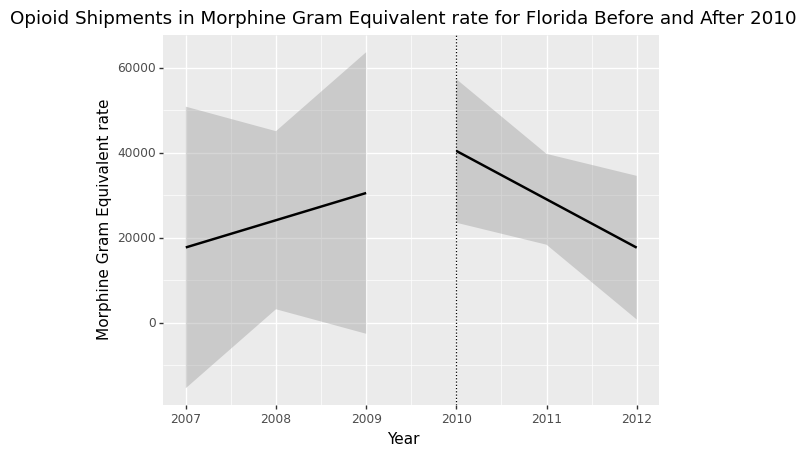

In [28]:
prepos = (
    pre_post_fl(fl_prepol_treatment, fl_postpol_treatment, "Year", "Prescription_Rate", 2010)
    + labs(
        title="Opioid Shipments in Morphine Gram Equivalent rate for Florida Before and After 2010"
    )
    + ylab("Morphine Gram Equivalent rate")
)

print(prepos)

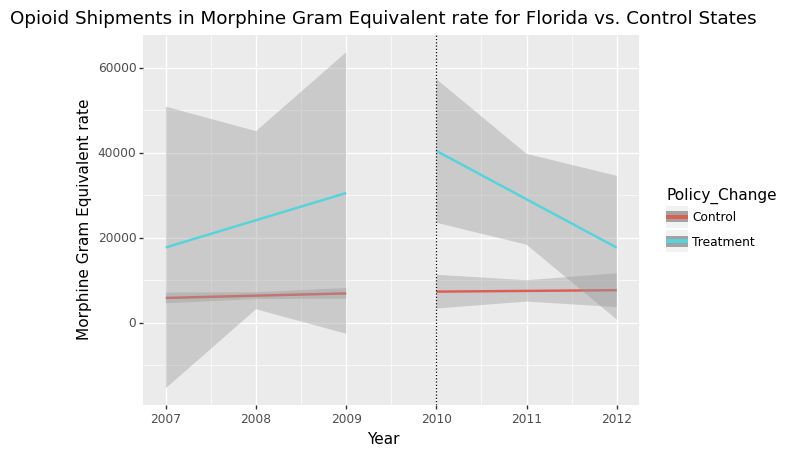

In [30]:
diff = (
    diffIndiff_fl(
        fl_prepol_control, fl_postpol_control, fl_prepol_treatment, fl_postpol_treatment, "Year", "Prescription_Rate", 2010
    )
    + labs(
        title="Opioid Shipments in Morphine Gram Equivalent rate for Florida vs. Control States",
        color="Policy_Change",
    )
    + ylab("Morphine Gram Equivalent rate")
)
print(diff)